In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from keras.utils import to_categorical
from keras.optimizers import RMSprop, Adam

from PIL import Image
from skimage.io import imread

In [203]:
img = Image.open('ripe/ripe1.jpeg')
img.size

(3024, 4032)

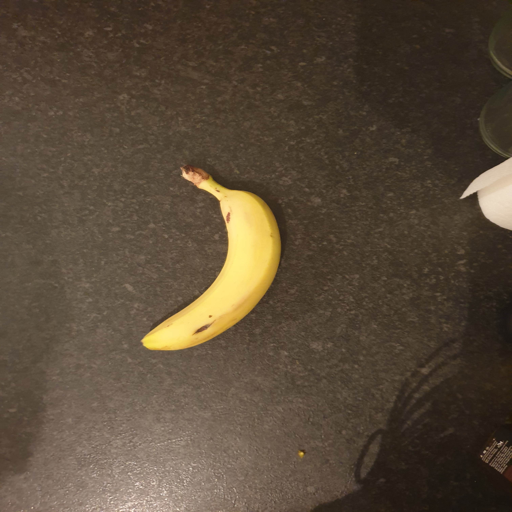

In [204]:
img.resize((512, 512))

In [205]:
resizer = (512, 512)#(256, 256)
for sub, dirs, files in os.walk('./'):
    for file in files:
        if '.jp' not in file or '256' in file or '512' in file:
            continue
        else:
            path = os.path.join(sub, file)
            img = Image.open(path)
            img = img.resize(resizer)
            new_path = f'{sub}/{resizer[0]}_{file}'
            img.save(new_path)

In [207]:
data = []
targets = []
for sub, dirs, files in os.walk('./'):
    for file in files:
        if ('.jp' not in file) or (str(resizer[0]) not in file):
            continue
        else:
            #print(file)
            path = os.path.join(sub, file)
            
            im = imread(path)#, as_gray = True)
            
            data.append(im)
            
            if f'{str(resizer[0])}_overripe' in file:
                targets.append(2)
            elif f'{str(resizer[0])}_ripe' in file:
                targets.append(1)
            elif f'{str(resizer[0])}_underripe' in file:
                targets.append(0)

In [208]:
data = np.array(data)
targets = np.array(targets)

In [209]:
len(data)

116

In [210]:
len(targets)

116

In [211]:
targets

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [212]:
targets_cat = to_categorical(targets)

In [213]:
x_train, x_test, y_train, y_test = train_test_split(data, targets_cat, test_size=0.1, random_state=42)

In [223]:
def make_model():
    model = Sequential()
    model.add(Input(shape=(512, 512, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    #model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    #model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    #model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))
    opt = Adam(learning_rate = 1e-4)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=[keras.metrics.F1Score()])
    return model

In [224]:
model = make_model()

In [225]:
x_train, x_test, y_train, y_test = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

In [226]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - f1_score: 0.3030 - loss: 4337.6890 - val_f1_score: 0.3030 - val_loss: 10309.9180
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step - f1_score: 0.2930 - loss: 9484.4805 - val_f1_score: 0.3856 - val_loss: 4950.4492
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - f1_score: 0.3538 - loss: 4607.5723 - val_f1_score: 0.6508 - val_loss: 1153.2103
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step - f1_score: 0.4644 - loss: 1274.4583 - val_f1_score: 0.3030 - val_loss: 573.2686
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step - f1_score: 0.3937 - loss: 1267.7147 - val_f1_score: 0.3030 - val_loss: 185.2520
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 8s/step - f1_score: 0.5306 - loss: 641.9092 - val_f1_score: 0.3856 - val_loss: 736.0714
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step - f1_score: 0.5227 - loss: 556.3099 - val_f1_score: 0.3030 - val_loss: 316.5688
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step - f1_score: 0.6413 - loss: 253.9627 - val_f1_sc

In [ ]:
preds = model.predict(x_test)